In [7]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
import matplotlib.pyplot as plt

# Suppose this is your plot
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 5, 6], marker='o')

# Now, before converting:
for line in ax.get_lines():
    # Check the marker facecolor
    fc = line.get_markerfacecolor()
    if fc == 'none':
        # Replace 'none' with transparent color
        line.set_markerfacecolor((0,0,0,0))  # RGBA transparent

# Now convert to plotly
import plotly.tools as tls
plotly_fig = tls.mpl_to_plotly(fig)


In [8]:
# 2. Load Cleaned Datasets
benin = pd.read_csv(r'C:\Users\hp\Desktop\10 Acadamy\VS code\benin-malanville.csv')
sierra_leone = pd.read_csv(r'C:\Users\hp\Desktop\10 Acadamy\VS code\sierraleone-bumbuna.csv')
togo =pd.read_csv(r'C:\Users\hp\Desktop\10 Acadamy\VS code\togo-dapaong_qc.csv')

benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

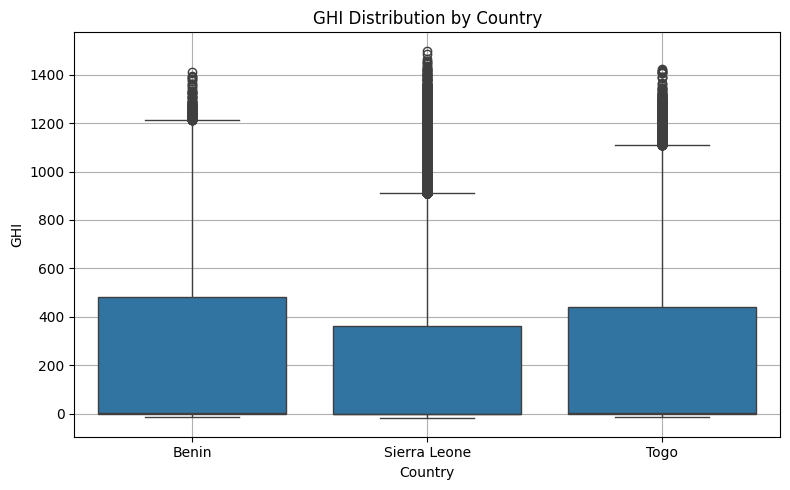

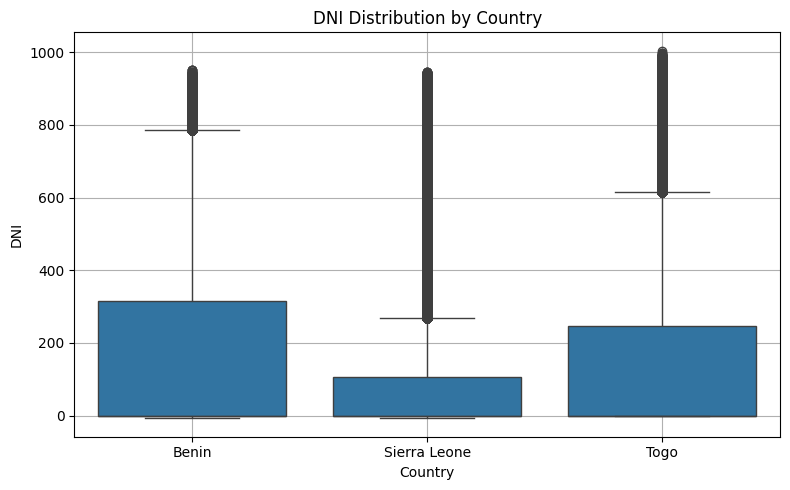

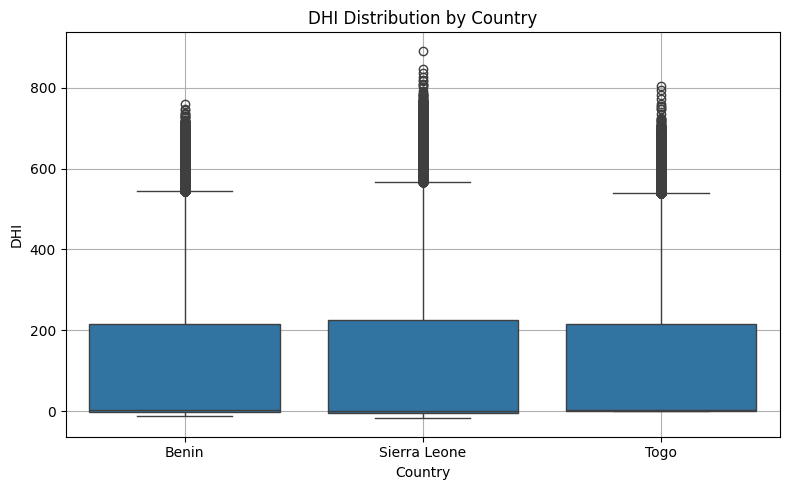

In [9]:
# 3. Metric Comparison (Boxplots)
for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
# 4. Summary Table
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
print("\nSummary Table (mean, median, std):")
print(summary)


Summary Table (mean, median, std):
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  


In [11]:
# 5. Statistical Testing (ANOVA)
ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra_leone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print("\nANOVA p-value (GHI):", anova_result.pvalue)
print("Kruskal-Wallis p-value (GHI):", kruskal_result.pvalue)


ANOVA p-value (GHI): 0.0
Kruskal-Wallis p-value (GHI): 0.0


# - Togo shows highest median GHI with relatively low variability.
# - Sierra Leone has the lowest average DNI, indicating lower direct sunlight potential.
# - Benin exhibits the highest standard deviation in DHI, suggesting fluctuation in diffuse radiation.

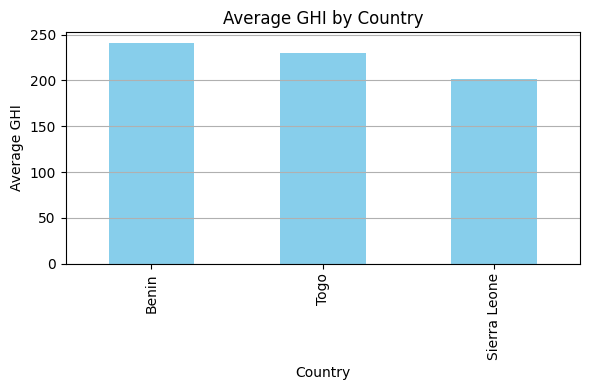

In [12]:
# 7. Bonus: Visual Summary - Bar Chart
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
avg_ghi.plot(kind='bar', color='skyblue')
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.grid(axis='y')
plt.tight_layout()
plt.show()